# Question 1
## Verification of ML Estimate of Mean and variance of Normal distribution
1. Write a function that generates a sample of n normally distributed random variables of given dimension d, mean mu and covariance sigma.
2. Compute the sample mean and covariance matrix.
3. Compute the error between the sample statistics and the actual parameters.
4. Repeat this for increasing sample sizes ranging from 100 to say 10000 for one and two dimensional random vectors and plot the squared errors generated as a function of n.(As n grows larger the error should grow smaller and smaller)

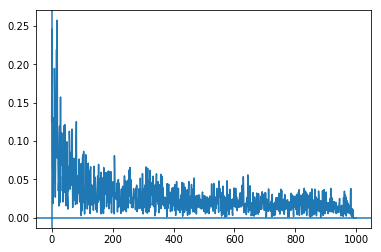

In [10]:
import numpy as np
import math
import matplotlib.pyplot as plt

def createData(n, d, mu, sigma):
    x = np.zeros((n, d))
    x = np.random.multivariate_normal(mu, sigma, n)
    return x

def main():
    upper = 10000
    lower = 100
    step = 10
    d = 1
    mu = [0]
    sigma = [[1]]
    err = np.zeros(int(upper/step))
    i = 0
    for n in range(lower, upper, step):
        data = createData(n, d, mu, sigma)
        sMu = np.mean(data, axis=0)
        sSigma = np.var(data)
        err[i] = math.sqrt(((mu - sMu)**2 + (sigma - sSigma)**2))
        i+=1
    
    plt.plot(err)
    plt.axvline(x=0)
    plt.axhline(y=0)
    plt.show()
    
main()


### ***WORKING ON REAL DATA***


***Bayesian classifier *** is a supervised technique as the class specific parameters of the distributions are to estimated from the observations. This requires labelled data. From the data belonging to each class the parameters are estimated. The decision boundary is computed using the estimated parameters. In this assignment we will be doing exactly this. <br\>
Also through this assignment we will see how a supervised learning algorithm is developed using the data given to us. Assume that we have been given a sample of size N. We divide this into two sets namely **Training set** and **Test set**. The training set is used for estimating the parameters and also computing the decision boundary.
The Test set is used to check how well the classifier is performing. We compute accuracy measures on the testing test. (Make sure that Training and Test Sets contain no common elements - because we want to see how well the algorithm can discriminate previously unseen observations.)<br\>
Generally the major portion of the data set will be the training set as estimating the parameters of the classifier requires a good number of observations. Therefore it is a common practice to split the data set as 70:30 for training and test set respectively. That is 70% will be given for traning and 30% for testing. And the data vectors are randomly picked to be assigned to both classes.

#### Data Set (Pima Indians diabetes dataset)
- https://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes <br\>
Read the description of the data also to get a better understanding of the problem.
- Download the data as a file with csv extension into the same directory as this notebook.
- There are two classes in this dataset.
- The functions for reading the csv file and splitting the data set into training and test sets is given in the cell below. Go through the code and understand it.

In [11]:
import csv
import numpy as np
from copy import deepcopy

#reads the csv file and returns a numpy array dataset of dimensions Nx(d+1). N is the number of random vectors and 
#d is the dimension. dataset has N rows each one being an observation of dimension d. the (d+1)th column 
# contains the labels.
def loadCsv(filename):
    lines = csv.reader(open(filename, "rt"))#read the file
    dataset = list(lines)
    for i in range(len(dataset)):
        dataset[i] = [float(x) for x in dataset[i]] #converting to floating point numbers from integers
    dataset = np.asfarray(dataset)#list to numpy array conversion
    return dataset

# splits the entire set into training and test set. training set will contain splitratio x N number of observations
# randomly chosen from the set. the rest will go to the test set.
def splitDataset(dataset, splitratio):
    trainsize = int(np.round(dataset.shape[0]*splitratio))
    trainset = np.zeros((trainsize,dataset.shape[1]))#array to store the training set.
    testset = deepcopy(dataset)#create a copy of the dataset in test set.
    for numsamples in range(trainsize):
        indx = np.random.randint(0,testset.shape[0])#random index generation
        trainset[numsamples,:] = testset[indx,:]#adding the randomly selected data vector to the training set
        testset = np.delete(testset, indx, axis = 0)#delete the selected observation from the test set.
    return trainset,testset

#the input to this function is an Nxd+1 array. it returns a dictionary databyclass which has two items containing 
#observations in the array segregated into the two classes.
def seperateByClass(dataset):
    databyclass = {}
    for vector in dataset:
        classid = int(vector[-1])
        if classid not in databyclass:
            databyclass[classid] = []
        databyclass[classid].append(vector)
    for classid in databyclass.keys():
        databyclass[classid] = np.asfarray(databyclass[classid])
    return databyclass


Unlike the previous assignment this time we are working on a real data set. In fact we have no idea what kind of distribution that data is following in each class. Therefore we make some assumptions about the distributions. Assume that data belonging to both classes are normally distributed. Another simplifying assumption is that the covariance matrix is diagonal, so that you need to compute only the variance of each individual feature separately.(**This is called naive bayes assumption**)

# Question 2
1. Compute the mean and covariance matrix of each class.
2. Compute the prior probabilities of the two classes.
3. Write a classifier function that returns the class label of an input data vector.
4. Compute the classification accuracy as we did in the first assignment.

In [12]:
def classifyData(X, mu1, sigma1, mu2, sigma2, p1): #get the class of data vector X
    val = evaluate(X, mu1, sigma1, p1) - evaluate(X, mu2, sigma2, (1 - p1)) #finding ln(p1*P1(x)) = ln(p2*P2(x))
    if(val > 0):
        return 0 # class 1
    else:
        return 1 # class 2

def evaluate(X, mu, sigma, p): # getting ln(p*P(X)) 
    p = np.log(p)
    term1 = np.matmul(np.matmul((X - mu), np.linalg.inv(sigma)), (X - mu).transpose())
    term2 = (mu.shape[0]/2) * np.log(2 * np.pi * np.linalg.det(sigma))
    return (p - (0.5* term1) - term2)


def main(): # main program
    dataset = loadCsv("diabetes_data.csv") # load dataset 
    trainset, testset = splitDataset(dataset, 0.7) # splitting the data set in particular ratio
    tempSet = seperateByClass(trainset) # getting seperate distribution by class

    # for class 1 mean, covariance, p1
    mu1 = np.mean(tempSet[0][:, 0:8], axis = 0) 
    cov1 = np.diag(np.var(tempSet[0][:, 0:8], axis = 0))
    print("mu1: ", mu1, "\nsigma1: ", cov1)
    p1 = tempSet[0].shape[0]/(trainset.shape[0])
    # for class 2 mean, covariance, p2 
    mu2 = np.mean(tempSet[1][:, 0:8], axis = 0)
    cov2 = np.diag(np.var(tempSet[1][:, 0:8], axis = 0))
    print("\nmu2: ", mu2, "\nsigma2: ", cov2)
    p2 = 1 - p1

    print("\np1: ", p1, "p2: ", p2) #prior probability
    #testing with testset data
    testCount = testset.shape[0]
    out = np.zeros(testset.shape[0])
    correct = 0
    for i in range(0, testCount):
        out[i] = classifyData(testset[i, 0:8], mu1, cov1, mu2, cov2, p1) #finding class of ith test element
        if(out[i]==testset[i, 8]): # check for accuracy
            correct+=1
    #print(out)
    #printing accuracy
    print("\ncorrect: ", correct, "out of: ", testCount)
    print("accuracy: ", (correct*100/testCount))
    return
    
main() # call main program


mu1:  [   3.1416185   109.89017341   68.05202312   19.78901734   67.87283237
   30.48236994    0.40871965   30.78323699] 
sigma1:  [[  8.65913495e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   6.84964817e+02   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   3.23552207e+02   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   2.26860111e+02
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    8.80416302e+03   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   5.77126661e+01   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.